In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import plotly.express as px

In [2]:
file_path = "offer.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


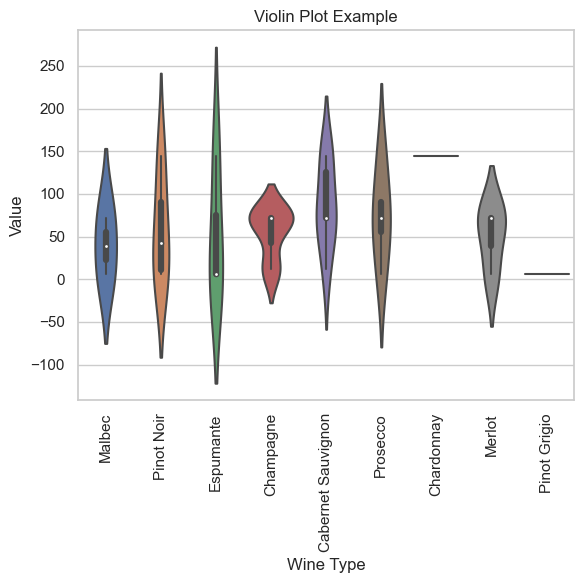

In [13]:
sns.set(style="whitegrid")
sns.violinplot(x='Varietal', y='Minimum Qty (kg)', data=df)
plt.xlabel('Wine Type')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.title('Violin Plot Example')
plt.show()

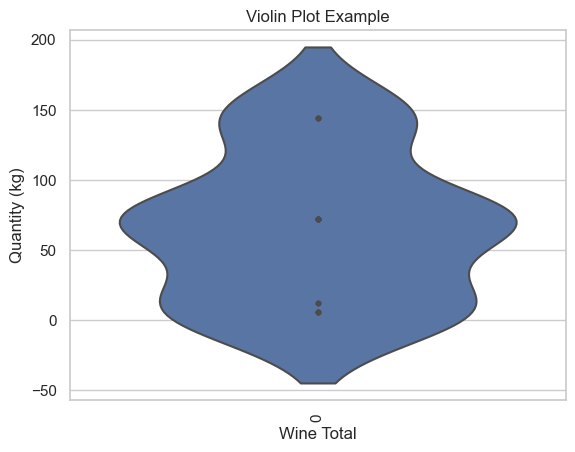

In [15]:
sns.set(style="whitegrid")
sns.violinplot(df['Minimum Qty (kg)'], inner='point')
plt.xlabel('Wine Total')
plt.ylabel('Quantity (kg)')
plt.xticks(rotation=90)
plt.title('Violin Plot Example')
plt.show()

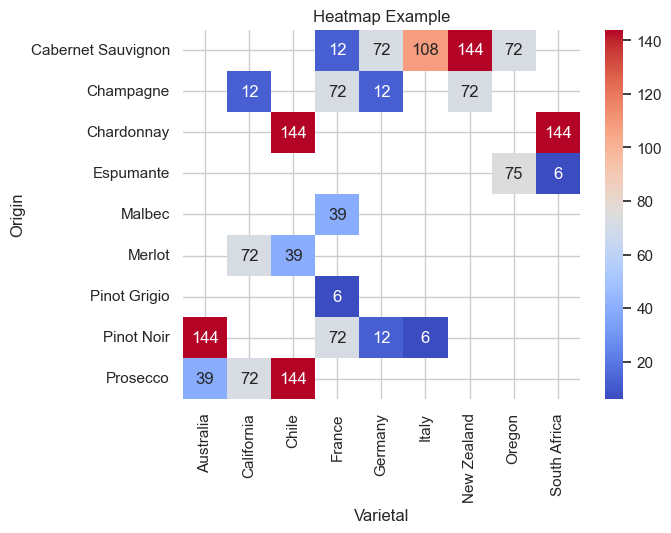

In [5]:
df = df.drop_duplicates()
heatmap_data = df.pivot_table(index='Varietal', columns='Origin', values='Minimum Qty (kg)')
sns.heatmap(data=heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.ylabel('Origin')
plt.xlabel('Varietal')
plt.title('Heatmap Example')
plt.show()

In [12]:
agg_data = df.groupby(['Varietal', 'Origin'])['Minimum Qty (kg)'].mean().unstack(fill_value=0)
varietal_counts = df['Varietal'].value_counts()

crosstab_data = pd.crosstab(df['Varietal'], df['Origin'])
fig = px.imshow(crosstab_data, x=crosstab_data.columns, y=crosstab_data.index, color_continuous_scale='blues')
fig.update_xaxes(title='Origin')
fig.update_yaxes(title='Varietal')
fig.update_layout(title='Wine Varation vs. Origin Heatmap')
fig.show()